In [1]:
import pandas as pd
import numpy as np
import math
import scipy.stats as st
import matplotlib
import seaborn as sb
import statsmodels.api as sm
import itertools
import matplotlib.pyplot as plt
import matplotlib_venn as venn
from matplotlib import pyplot
from scipy.stats import shapiro
from numpy.random import randn
from scipy.stats import normaltest
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.stats import chi2
from statsmodels.tsa.stattools import adfuller

In [3]:
pip install matplotlib_venn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for matplotlib_venn: filename=matplotlib_venn-0.11.7-py3-none-any.whl size=32155 sha256=75e94df13a130e1120a46442437ad7432aaa100fb77fc0d338b8864070968b7d
  Stored in directory: c:\users\judie baker\appdata\local\pip\cache\wheels\32\41\5f\d0f29cd092d042d8e8a87d7bbe42193166aa555ff38b377343
Successfully built matplotlib_venn
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Hypothesis Testing: helps proving or disapproving the claims which are being tested
# creates the structure of problem statement
# H0 = NULL conditional exist, nothing new happening, old beliefs are true
# h1 = new theory is true, something new is happening, old beliefes are false
data = pd.read_csv('documents/SetOfHeights.txt')
data.to_csv('documents/SetOfHeights.csv')
data

,Heights,Gender
0,160.377337,Male
1,177.637818,Male
2,166.258270,Male
3,182.467287,Male
4,182.368534,Male
...,...,...
995,170.081594,Female
996,159.978178,Female
997,150.668404,Female
998,163.985544,Female


In [ ]:
# steps of HT:
    # 1. create a null hypothesis (null & alt)
    # 2. set alpha = 0.05
    # 3. get data
    # 4. analyze
    # 5. state the decision, H0 = 170 & H1 != 170

In [6]:
data['Heights'].mean()

168.30635473929416

In [7]:
sampdata = data['Heights'][np.argsort(np.random.random(1000)[:70])]
sampdata

36    163.681258
58    172.188947
24    169.216574
26    179.537652
64    181.824515
         ...    
33    175.179213
17    180.573097
57    174.290963
54    182.397064
43    176.503942
Name: Heights, Length: 70, dtype: float64

In [8]:
# mean of sample data
mean = sampdata.mean()
hypm = 170
n = 70

# std deviation of population data
stdpop = np.std(data['Heights'])
stdpop

9.807998879179232

In [9]:
# value of z score: two sided test, 0.05/2 = 0.25 for two sided z-table +- 1.96
(mean - hypm)/(stdpop/math.sqrt(n))

3.7145225383559084

In [ ]:
# obs 3.7 > critical 1.96: we do not reject the H0
# z value = 0.68
# p value = 1 - 0.68

In [10]:
1 - 0.68
# 0.3 > 0.05, fail to reject the H0

0.31999999999999995

In [12]:
st.ttest_1samp(sampdata,170)

Ttest_1sampResult(statistic=4.745097937928107, pvalue=1.0889323529797857e-05)

In [13]:
# we reject H0
1.0889323529797857e-05 > 0.05

False

In [14]:
wine = pd.read_csv('documents/winequality-red.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


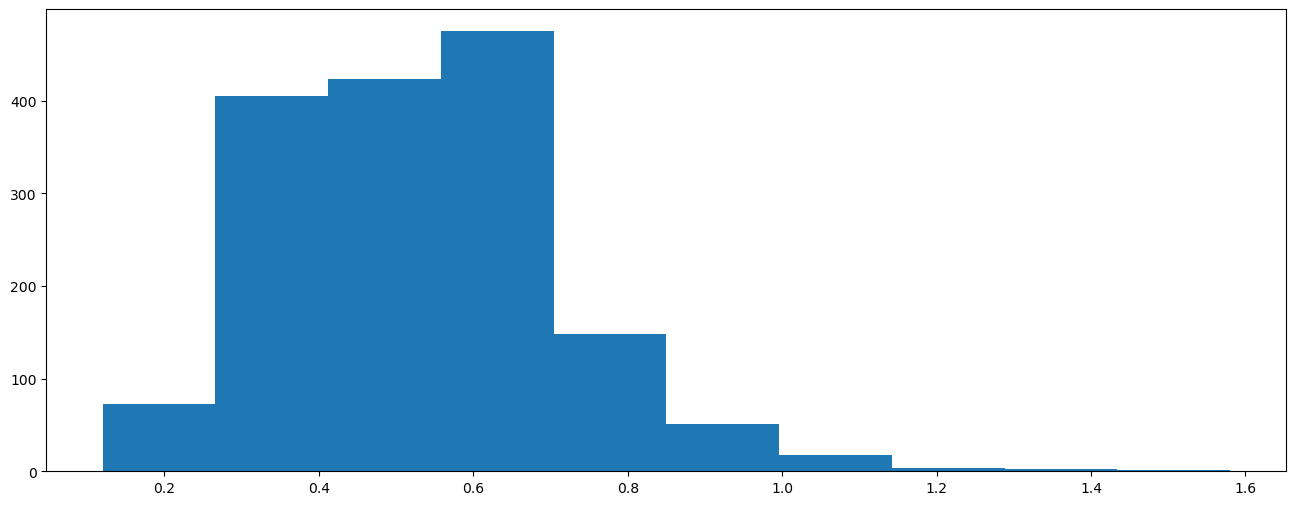

In [16]:
pyplot.figure(figsize=(16,6))
pyplot.hist(wine['volatile acidity'])
pyplot.show()

In [30]:
datatest = wine['volatile acidity']
stat,p = shapiro(datatest)
print('stat-%0.2F,p-%0.30f'% (stat,p))
if p > 0.05:
    print('Normal Distribution')
else:
    print('Unnormal Distribution')

stat-0.97,p-0.000000000000000268638537394731
Unnormal Distribution


In [35]:
# generate normal dist data using randn func
datatest = randn(100)
datatest

array([-1.25150558,  1.96161442,  1.27769641,  0.99460148, -0.33507405,
       -0.03146989,  0.63435367, -0.44124303,  0.6754903 ,  1.20580718,
        0.78280828, -0.35679995,  0.92013427, -1.05983258,  0.1871329 ,
        0.63760347, -0.28426457,  0.12621009,  0.94896126,  0.77220891,
        1.01894312,  1.10835417,  0.35139985,  0.89484782, -0.73206243,
       -1.2353759 , -0.01368999,  1.64906779,  0.45888928, -0.32838847,
        1.52496634,  1.21195768,  0.19824089, -0.95696504,  1.75226797,
        1.54901771,  0.18557178, -0.29086912, -0.58196957,  0.04667366,
        0.74917257, -1.48849892,  0.80554892,  2.00936985,  1.17879078,
       -0.27816731,  0.57950277,  0.09950269, -1.08396837,  0.40656585,
        1.05132565,  0.52862374,  1.36571857, -0.22470189,  0.40078352,
        0.24663161, -0.15460551,  0.98527423,  0.85071686,  0.72254248,
        0.27158348,  1.67115192, -0.19546381,  0.50599042, -1.2927468 ,
        0.08696835, -0.24875297,  0.73133602, -0.94629179,  1.13

In [36]:
stat,p = shapiro(datatest)
print('stat-%0.2F,p-%0.30f'% (stat,p))
if p > 0.05:
    print('Normal Distribution')
else:
    print('Unnormal Distribution')

stat-0.98,p-0.237687587738037109375000000000
Normal Distribution


In [39]:
# Normality Test using k**2
# identically dist: all elements have equal probability to occur
data = wine['volatile acidity']
stat,p = normaltest(data)
print('stat-%0.2F,p-%0.10f'% (stat,p))
if p > 0.05:
    print('Normal Distribution')
else:
    print('Unnormal Distribution')

stat-143.42,p-0.0000000000
Unnormal Distribution


In [40]:
# Corr Test - Pearson and Spearman's rank
# assumption: identical and normal dist data
wine 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


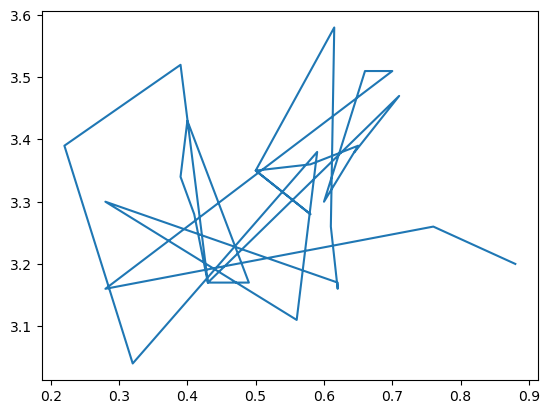

In [46]:
sampone = wine[1:30]['volatile acidity']
samptwo = wine[1:30]['pH']
pyplot.plot(sampone,samptwo)
pyplot.show()
# no correlation

In [47]:
# Spearman Rank
stat,p = spearmanr(sampone,samptwo)
print('stat-%0.2F,p-%0.5f'% (stat,p))
if p > 0.05:
    print('Independent Samples')
else:
    print('Dependent Samples')

stat-0.20,p-0.30136
Independent Samples


In [49]:
# Pearson 
stat,p = pearsonr(sampone,samptwo)
print('stat-%0.2F,p-%0.5f'% (stat,p))
if p > 0.05:
    print('Independent Samples')
else:
    print('Dependent Samples')

stat-0.18,p-0.36047
Independent Samples


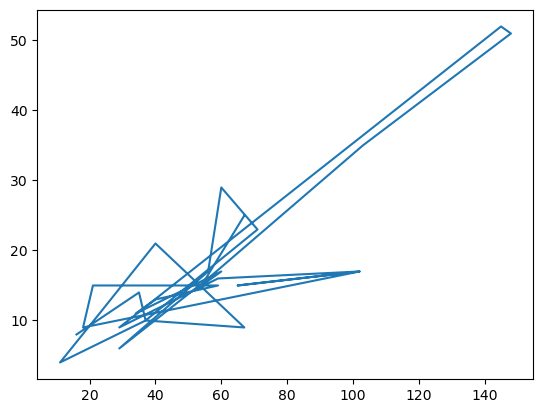

In [50]:
sampone = wine[1:30]['total sulfur dioxide']
samptwo = wine[1:30]['free sulfur dioxide']
pyplot.plot(sampone,samptwo)
pyplot.show()

In [51]:
# six students were chosen at random from a class given a math test
# teacher H0: class should pass by 70%
# scores of six students: 62, 92, 75, 68, 83, 95
# teacher confidence is 95% the mean score = 70%
# H0 = 70, H1 != 70, p-value = 0.05
scores=[62, 92, 75, 68, 83, 95]
st.ttest_1samp(scores,70)

Ttest_1sampResult(statistic=1.7053136360191492, pvalue=0.14885362711300268)

In [52]:
0.14885362711300268 > 0.05

True

In [54]:
jon_score = [23,21,31,20,19,35,26,22,21,19]
chris_score = [46,42,62,40,38,70,52,44,42,38]

In [56]:
print(np.mean(jon_score))
print(np.mean(chris_score))

23.7
47.4


In [61]:
st.ttest_1samp(jon_score,0)

Ttest_1sampResult(statistic=13.88788431654638, pvalue=2.1983272300073563e-07)

In [62]:
st.ttest_1samp(jon_score,15)

Ttest_1sampResult(statistic=5.098084116200569, pvalue=0.0006468242923305229)

In [64]:
st.ttest_1samp(jon_score,20)

Ttest_1sampResult(statistic=2.1681507160852993, pvalue=0.058288767709368715)

In [65]:
# independent two sample t-test: samples are taken from independent sources
# assuming both means are equal
st.ttest_ind(jon_score,chris_score)
# reject H0

Ttest_indResult(statistic=-6.210850679090182, pvalue=7.3390410384768156e-06)

In [66]:
# T-test: one test, independent test, paired test
# rel: related 
jon_score = [23,21,31,20,19,35,26,22,21,19]
jon_score2 = [46,42,62,40,38,70,52,44,42,38]
st.ttest_rel(jon_score,jon_score2)

Ttest_relResult(statistic=-13.88788431654638, pvalue=2.1983272300073563e-07)

In [67]:
2.1983272300073563e-07 > 0.05

False

In [68]:
avgscore = [40,44,60,50,48,55,46,44,54]
print(avgscore)
print(jon_score)
print(chris_score)

[40, 44, 60, 50, 48, 55, 46, 44, 54]
[23, 21, 31, 20, 19, 35, 26, 22, 21, 19]
[46, 42, 62, 40, 38, 70, 52, 44, 42, 38]


In [69]:
# One Way Anova Test
tstat,p = st.f_oneway(jon_score,avgscore,chris_score)
print('stat-%0.2F,p-%0.5f'% (stat,p))
if p > 0.05:
    print('Same Distribution of Score')
else:
    print('Different Distribution of Score')

stat-0.18,p-0.00000
Different Distribution of Score


In [74]:
# mannwhitneyu: dist of two or more samples are equal or not
# assumptions identical dist
class1_score=[91,90,81,80,76]
class2_score=[88,86,85,84,83]
tstat,p = st.mannwhitneyu(class1_score,class2_score)
print('stat-%0.2F,p-%0.5f'% (stat,p))
if p > 0.05:
    print('Same Distribution of Score')
else:
    print('Different Distribution of Score')

stat-0.18,p-0.69048
Same Distribution of Score


In [77]:
# Augmented Dickey Fuller Test: test for stationarity important for time series analyses
# stationary time series: having constant mean and variance
stock_price = [121,131,142,138,139,142,156,168,165]
stat,p,lags,obs,crit,t=adfuller(stock_price)
print('stat-%0.2F,p-%0.5f'% (stat,p))
if p > 0.05:
    print('Series is not stationary')
else:
    print('Series is stationary')

stat--0.95,p-0.77158
Series is not stationary


In [80]:
stock_price = [121,131,142,121,131,142,121,131,142]
stat,p,lags,obs,crit,t = adfuller(stock_price)
print('stat-%0.2F,p-%0.3f'% (stat,p))
if p > 0.05:
    print('Series is not stationary')
else:
    print('Series is stationary')

stat--704683169833.00,p-0.000
Series is stationary


In [82]:
ages = [10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]
len(ages)

31

In [83]:
age_mean = np.mean(ages)
age_mean

30.419354838709676

In [84]:
# sample data = 10 values
sample_size = 10
age_sample = np.random.choice(ages,sample_size)
age_sample

array([20, 20, 18, 25, 18, 55, 30, 26, 25, 25])

In [87]:
# H0 = there is no diff in mean, 30
# H1 = ther is diff in mean
ttest,p_value = st.ttest_1samp(age_sample,30)
if p < 0.05:
    print('Rejecting H0')
else:
    print('Accepting H0')

Rejecting H0


In [88]:
# paired t-test
weight1 = [25,30,28,35,28,34,26,29,30,26,28,32,31,30,45]
weight2 = weight1 + st.norm.rvs(scale = 5,loc = 1.25, size = 15)
print(weight1)
print(weight2)

[25, 30, 28, 35, 28, 34, 26, 29, 30, 26, 28, 32, 31, 30, 45]
[26.35854116 34.68659296 34.99286246 33.31701694 32.59681161 36.40427931
 22.36374202 33.14039739 27.02132676 27.91356899 43.12517794 29.04323938
 31.93861179 25.46893266 43.36054764]


In [90]:
weight_df = pd.DataFrame({'weight_10':np.array(weight1),'weight_20':np.array(weight2),'weight_change':np.array(weight2)-np.array(weight1)})
weight_df

,weight_10,weight_20,weight_change
0,25,26.358541,1.358541
1,30,34.686593,4.686593
2,28,34.992862,6.992862
3,35,33.317017,-1.682983
4,28,32.596812,4.596812
5,34,36.404279,2.404279
6,26,22.363742,-3.636258
7,29,33.140397,4.140397
8,30,27.021327,-2.978673
9,26,27.913569,1.913569


In [91]:
_,p_value = st.ttest_rel(a=weight1,b=weight2)
print(p_value)

0.23229271362179993


In [92]:
if p_value < 0.05:
    print('Reject H0')
else:
    print('Accept H0')

Accept H0


In [94]:
df = sb.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df.shape

In [95]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


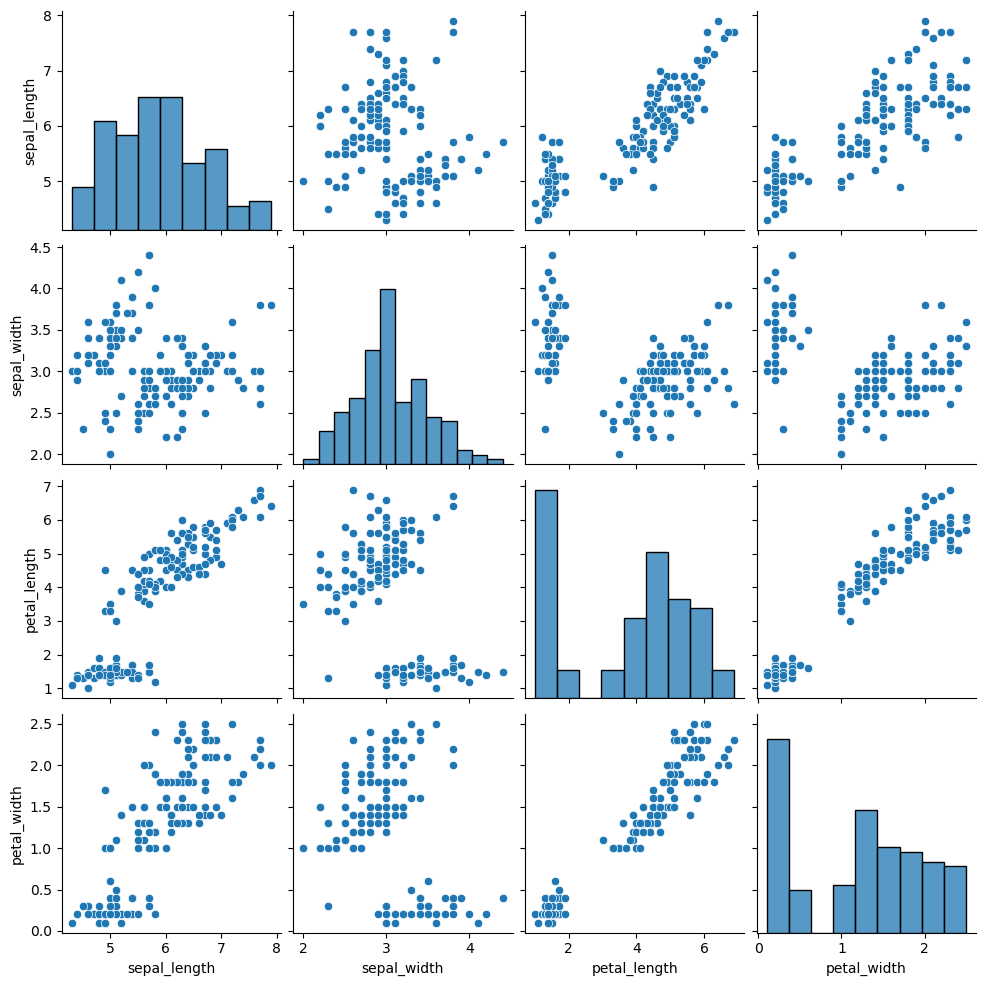

In [96]:
sb.pairplot(df)

In [98]:
dataset = sb.load_dataset('tips')
dataset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [99]:
# chi sq test: find the association b/w gender smoker
table = pd.crosstab(dataset['sex'],dataset['smoker'])
table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [100]:
# name these to odserved values
obs_val = table.values
print(obs_val)

[[60 97]
 [33 54]]


In [101]:
# chi^2 contingency func
val = st.chi2_contingency(table)
val

(0.0,
 1.0,
 1,
 array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [102]:
expected = val[3]

In [119]:
# degree of freedom (dof) = (rows-1) * (col-1)
# alpha = 0.5, learning rate
no_of_r = len(table.iloc[0:2,0])
no_of_c = len(table.iloc[0,0:2])
dof = (no_of_r-1) * (no_of_c-1)
print(dof)
alpha = 0.05

1


In [120]:
# chi2: x = summation(obs-expected)**2/expected
chi_square = sum([(o-e)**2/e for o,e in zip(obs_val,expected)])
chi_square_stats = chi_square[0] + chi_square[1]
print('chi_sq_stat:', chi_square_stats)

chi_sq_stat: 0.001934818536627623


In [121]:
# critical value
# ppf is percent point func and inverse of cdf (cummulative density func)
critical_val = chi2.ppf(q=1-alpha,df=dof)
print(critical_val)

3.841458820694124


In [122]:
# p-value
p_value = 1 - chi2.cdf(x=chi_square_stats,df=dof)
print(p_value)
print(alpha)
print(dof)

0.964915107315732
0.05
1


In [132]:
# chi_square_stats >= critical_val reject H0(association) else accept(no association)
# alpha >= p_value reject H0 else accept
if chi_square_stats >= critical_val:
    print('Reject H0, Association b/w two variables')
else:
    print('Accept H0, No assocation b/w two variables')
    
if alpha >= p_value:
    print('Reject H0, Association b/w two variables')
else:
    print('Accept H0, No assocation b/w two variables')

Accept H0, No assocation b/w two variables
Accept H0, No assocation b/w two variables


In [10]:
ratings_url = 'documents/teachingratings.csv'
ratings = pd.read_csv(ratings_url)
ratings

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,no,37,male,more,0.933396,3.5,upper,yes,yes,15,17,40,1,0,0,0,1,1,1
459,no,58,female,more,0.111563,3.5,upper,yes,yes,26,34,47,1,0,1,0,1,1,1
460,no,42,male,more,-0.900580,4.0,upper,yes,yes,45,86,61,1,0,0,0,1,1,1
461,no,39,male,more,0.643014,4.3,upper,yes,yes,22,29,62,1,0,0,0,1,1,1


In [ ]:
ratings.info
ratings.shape

In [134]:
ratings['students'].mean()

36.62419006479482

In [135]:
ratings['students'].median()

23.0

In [136]:
ratings['students'].min()

5

In [137]:
ratings['students'].max()

380

In [138]:
ratings.describe()

,age,beauty,eval,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
count,463.000000,4.630000e+02,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,48.365011,6.271140e-08,3.998272,36.624190,55.177106,45.434125,0.203024,0.138229,0.421166,0.058315,0.660907,0.939525,0.779698
std,9.802742,7.886477e-01,0.554866,45.018481,75.072800,27.508902,0.402685,0.345513,0.494280,0.234592,0.473913,0.238623,0.414899
min,29.000000,-1.450494e+00,2.100000,5.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,-6.562689e-01,3.600000,15.000000,19.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,48.000000,-6.801430e-02,4.000000,23.000000,29.000000,44.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,57.000000,5.456024e-01,4.400000,40.000000,60.000000,70.500000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,73.000000,1.970023e+00,5.000000,380.000000,581.000000,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([16., 51., 94., 66., 94., 42., 29., 40., 11., 20.]),
 array([-1.45049405, -1.10844234, -0.76639063, -0.42433892, -0.08228722,
         0.25976449,  0.6018162 ,  0.94386791,  1.28591962,  1.62797133,
         1.97002304]),
 <BarContainer object of 10 artists>)

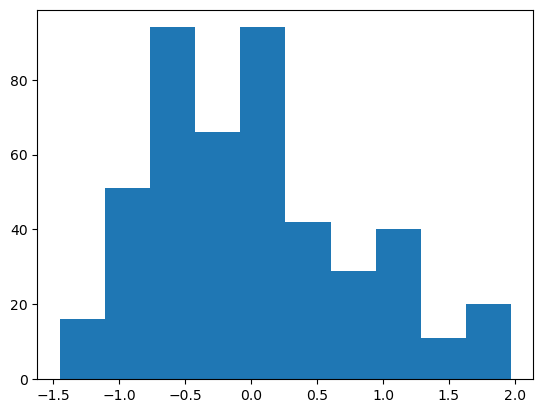

In [139]:
# histogram on beauty col
pyplot.hist(ratings['beauty'])

In [141]:
# avg beauty score differ by gender: find the mean, std and variance for both male and female instructors
# mean beauty score for women is higher than men
ratings.groupby('gender').agg({'beauty':['mean','std','var']}).reset_index()

gender    beauty                   
               mean      std       var
0  female  0.116109  0.81781  0.668813
1    male -0.084482  0.75713  0.573246

In [143]:
# calculate the percentage of visible minorities of tenure professors
tenure_count = ratings.groupby('minority').agg({'tenure':'count'}).reset_index()
tenure_count

# find percentage
tenure_count['percentage'] = 100 * tenure_count.tenure/tenure_count.tenure.sum()
tenure_count

,minority,tenure,percentage
0,no,399,86.177106
1,yes,64,13.822894


In [145]:
# mean and std for both tenured and untenured prof
# groupby of tenure and agg(age : mean, std)
ratings.groupby('tenure').agg({'age':['mean','std']}).reset_index()

tenure        age           
               mean        std
0     no  50.186275   6.946372
1    yes  47.850416  10.420056

(array([41., 37., 58., 48., 75., 74., 53., 69.,  0.,  8.]),
 array([29. , 33.4, 37.8, 42.2, 46.6, 51. , 55.4, 59.8, 64.2, 68.6, 73. ]),
 <BarContainer object of 10 artists>)

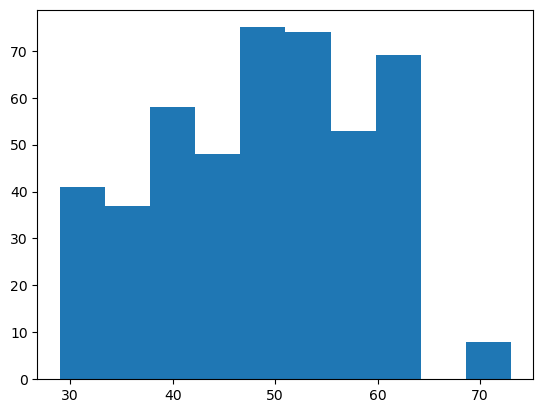

In [146]:
pyplot.hist(ratings['age'])

In [155]:
# median evaluation score for tenured prof
ratings[ratings['tenure']=='yes']['eval'].median()

4.0

C:\Users\Judie Baker\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Normal Dist'), Text(0, 0.5, 'Frequency')]

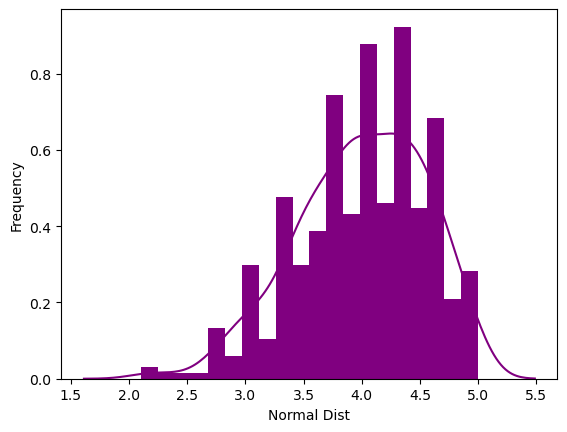

In [160]:
# t-test: gender affect teaching evaluation score
# H0: mu1 = mu2, no diff in evaluation score b/w male and female
# H1: mu1 != mu2, diff exist
ax = sb.distplot(ratings['eval'],bins=20,kde=True,color='purple',hist_kws={'linewidth':15, 'alpha':1})
ax.set(xlabel='Normal Dist',ylabel='Frequency')

In [161]:
st.levene(ratings[ratings['gender']=='female']['eval'],ratings[ratings['gender']=='male']['eval'],center='mean')

LeveneResult(statistic=0.19032922435292574, pvalue=0.6628469836244741)

In [168]:
# regression analysis: gender affected teaching evaluation score
# H0: if beta = 0 no affect
# H1: if beta != 0 effect (female = 1, male = 0)
x = ratings['female']
y = ratings['eval']

# add an intercept val = beta0 to our model
x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     10.56
Date:                Mon, 12 Dec 2022   Prob (F-statistic):            0.00124
Time:                        15:23:15   Log-Likelihood:                -378.50
No. Observations:                 463   AIC:                             761.0
Df Residuals:                     461   BIC:                             769.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0690      0.034    121.288      0.000       4.003       4.135
female        -0.1680      0.052     -3.250      0.001      -0.270      -0.066
==============================================================================
Omnibus:                       17.625   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.970
Skew:                          -0.496   Prob(JB):                     7.60e-05
Kurtosis:                       2.981   Cond. No.                         2.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
# probability

# sample space
cards = 52

# outcome
aces = 4

# divide possible outcome/sample set
ace_prob = aces/cards
print('probability:', round(ace_prob,2))

probability: 0.08


In [8]:
# prob of hearts

# sample space
cards = 52

# outcome
hearts = 13

# divide possible outcome/sample set
heart_prob = hearts/cards
print('probability:', heart_prob)

probability: 0.25


In [172]:
set1 = {1,2}
print(set1)
print(type(set1))

{1, 2}
<class 'set'>


In [173]:
my_list = [1,2,3,4]
my_set = set(my_list)
print(my_set)

{1, 2, 3, 4}


In [ ]:
# membership testing with in and not in
my_set1 = set([1,3,5])
print('1 is in the set:', 1 in my_set1)

In [175]:
s1 = {1,2,3,4,5,6}
s2 = {1,2,3,4,0,6}
print('s1 and s2 are equal', s1 == s2)

s1 and s2 are equal False


In [176]:
s_inter = s1.intersection(s2)
s_inter

{1, 2, 3, 4, 6}

In [177]:
def cartesian_product(s1,s2):
    result = set()
    for i in s1:
        for j in s2:
            result.add(tuple([i,j]))
    return(result)

In [178]:
# cartesian product
a = set(['a','b','c'])
s = {1,2,3}
c = cartesian_product(a,s)
print('cartesian product \n{} X {} :{}'.format(a,s,c))

cartesian product 
{'a', 'c', 'b'} X {1, 2, 3} :{('a', 1), ('c', 2), ('b', 1), ('a', 3), ('b', 3), ('c', 1), ('a', 2), ('c', 3), ('b', 2)}


In [2]:
st="ABC"
values=[1,2,3]
per=itertools.permutations(st)
for val in per:
    print(*val)

A B C
A C B
B A C
B C A
C A B
C B A


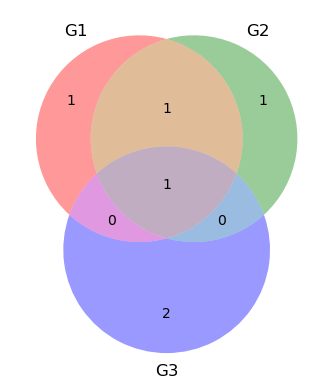

In [4]:
set1=set(['A','B','C'])
set2=set(['A','B','D'])
set3=set(['A','E','F'])

venn.venn3([set1,set2,set3],('G1','G2','G3'))
plt.show()

In [ ]:
# chi square for tenure prof to find any association b/w tenure and gender using chi square test
# H0 = tenure is independent of gender
# H1 =  tenure is associated with gender


In [12]:
table = pd.crosstab(ratings['gender'],ratings['tenure'])
table

tenure,no,yes
gender,,
female,50,145
male,52,216


In [13]:
obs_val = table.values
print(obs_val)

[[ 50 145]
 [ 52 216]]


In [14]:
val = st.chi2_contingency(table)
val

(2.20678166999886,
 0.1374050603563787,
 1,
 array([[ 42.95896328, 152.04103672],
        [ 59.04103672, 208.95896328]]))

In [15]:
expected = val[3]

In [16]:
no_of_r = len(table.iloc[0:2,0])
no_of_c = len(table.iloc[0,0:2])
dof = (no_of_r-1) * (no_of_c-1)
print(dof)
alpha = 0.05

1


In [17]:
chi_square = sum([(o-e)**2/e for o,e in zip(obs_val,expected)])
chi_square_stats = chi_square[0] + chi_square[1]
print('chi_sq_stat:', chi_square_stats)

chi_sq_stat: 2.557051129789522


In [18]:
critical_val = chi2.ppf(q=1-alpha,df=dof)
print(critical_val)

3.841458820694124


In [19]:
p_value = 1 - chi2.cdf(x=chi_square_stats,df=dof)
print(p_value)
print(alpha)
print(dof)

0.10980322511302842
0.05
1


In [20]:
if chi_square_stats >= critical_val:
    print('Reject H0, Association b/w two variables')
else:
    print('Accept H0, No assocation b/w two variables')
    
if alpha >= p_value:
    print('Reject H0, Association b/w two variables')
else:
    print('Accept H0, No assocation b/w two variables')

Accept H0, No assocation b/w two variables
Accept H0, No assocation b/w two variables
